Installing necessary packages:

```Julia
using Pkg

Pkg.add(["DataFrames", "Statistics", "CSV", "Plots", "StatsPlots"])
```

In [1]:
using DataFrames, Statistics, CSV, Plots, StatsPlots

In [2]:
df = CSV.read(pwd() * "/data_raw/init_res.csv", DataFrame)

describe(df)

6×7 DataFrame
 Row │ variable       mean     min      median   max      nmissing  eltype   
     │ Symbol         Float64  Float64  Float64  Float64  Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────
   1 │ actual         10385.6  9539.0   10383.0  11291.0         0  Float64
   2 │ expected       10386.4  9644.23  10384.1  11138.6         0  Float64
   3 │ glm_est        10109.7  7737.6   10096.3  12628.6         0  Float64
   4 │ ols_est        10026.6  7491.12  10012.3  13909.2         0  Float64
   5 │ mle_glm_start  10075.4  7635.48  10064.9  12928.9         0  Float64
   6 │ mle_lm_start   10075.4  7635.48  10064.9  12928.9         0  Float64

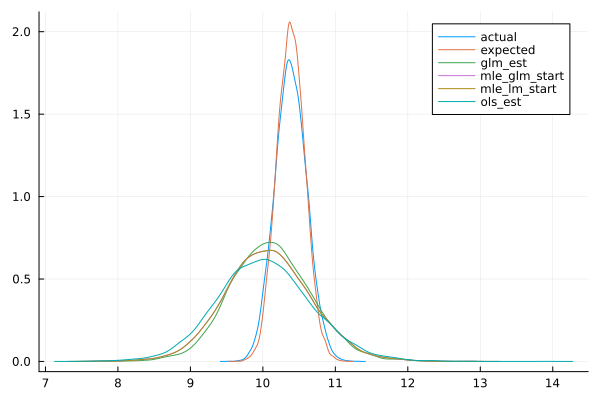

In [4]:
df_plot = stack(df, 1:6)

density(df_plot[:, :value] / 1000, group = df_plot[:, :variable])

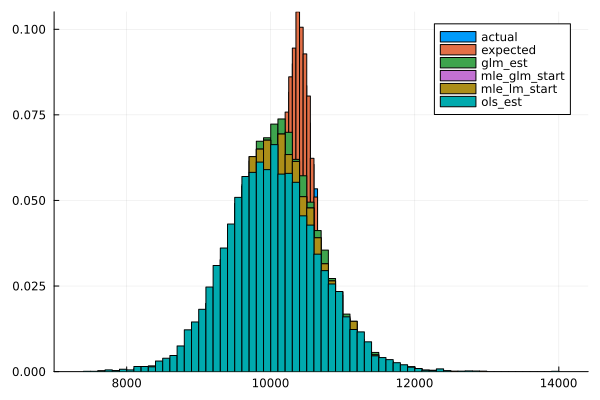

In [6]:
histogram(df_plot[:, :value], group = df_plot[:, :variable], bar_position = :stack; normalize=:probability)

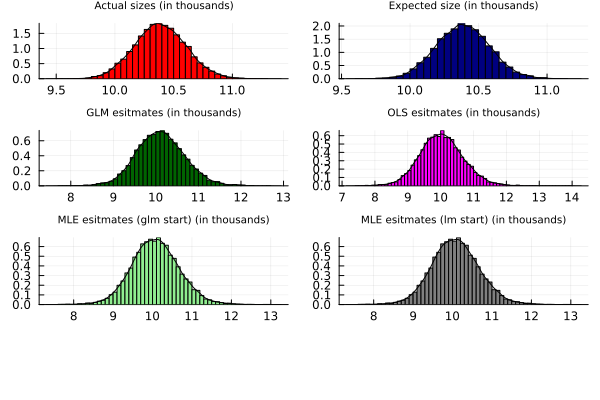

In [7]:
p1 = histogram(df[:, 1] / 1000, normalize = true, legend = false, colour = :red, title = "Actual sizes (in thousands)", titlefontsize = 7)
density!(df[:, 1] / 1000, legend = false, colour = :black)

p2 = histogram(df[:, 2] / 1000, normalize = true, legend = false, title = "Expected size (in thousands)", colour = :navy, titlefontsize = 7)
density!(df[:, 2] / 1000, legend = false, colour = :black)

p3 = histogram(df[:, 3] / 1000, normalize = true, legend = false, title = "GLM esitmates (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!(df[:, 3] / 1000, legend = false, colour = :black)

p4 = histogram(df[:, 4] / 1000, normalize = true, legend = false, title = "OLS esitmates (in thousands)", colour = :magenta, titlefontsize = 7)
density!(df[:, 4] / 1000, legend = false, colour = :black)

p5 = histogram(df[:, 5] / 1000, normalize = true, legend = false, title = "MLE esitmates (glm start) (in thousands)", colour = :lightgreen, titlefontsize = 7)
density!(df[:, 5] / 1000, legend = false, colour = :black)

p6 = histogram(df[:, 6] / 1000, normalize = true, legend = false, title = "MLE esitmates (lm start) (in thousands)", colour = :gray, titlefontsize = 7)
density!(df[:, 6] / 1000, legend = false, colour = :black)

plot(
    layout = [3, 3],
    p1, p2, p3, p4, p5, p6
)

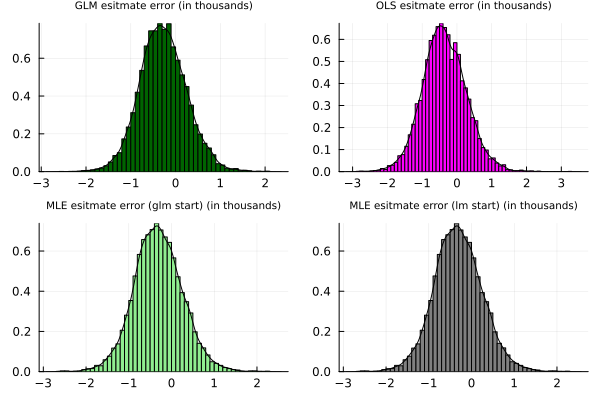

In [9]:
p1 = histogram((df[:, 3] - df[:, 1]) / 1000, normalize = true, legend = false, title = "GLM esitmate error (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!((df[:, 3] - df[:, 1]) / 1000, legend = false, colour = :black)

p2 = histogram((df[:, 4] - df[:, 1]) / 1000, normalize = true, legend = false, title = "OLS esitmate error (in thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 4] - df[:, 1]) / 1000, legend = false, colour = :black)

p3 = histogram((df[:, 5] - df[:, 1]) / 1000, normalize = true, legend = false, title = "MLE esitmate error (glm start) (in thousands)", colour = :lightgreen, titlefontsize = 7)
density!((df[:, 5] - df[:, 1]) / 1000, legend = false, colour = :black)

p4 = histogram((df[:, 6] - df[:, 1]) / 1000, normalize = true, legend = false, title = "MLE esitmate error (lm start) (in thousands)", colour = :gray, titlefontsize = 7)
density!((df[:, 6] - df[:, 1]) / 1000, legend = false, colour = :black)

plot(
    p1, p2, p3, p4, layout = [2, 2]
)

### Higher population counts

In [10]:
df = CSV.read(pwd() * "/data_raw/init_res_1.csv", DataFrame)

describe(df)

6×7 DataFrame
 Row │ variable       mean       min             median          max           ⋯
     │ Symbol         Float64    Float64         Float64         Float64       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ actual         6.03295e5  552533.0        603318.0        666878.0      ⋯
   2 │ expected       6.03301e5       5.52508e5       6.0332e5        6.66694e
   3 │ glm_est        5.40564e5   76104.5             5.21386e5       2.21917e
   4 │ ols_est        5.41198e5   76830.3             5.21469e5       2.37782e
   5 │ mle_glm_start  5.4115e5    75757.0             5.21319e5       2.38386e ⋯
   6 │ mle_lm_start   5.4115e5    75757.0             5.21319e5       2.38386e
                                                               3 columns omitted

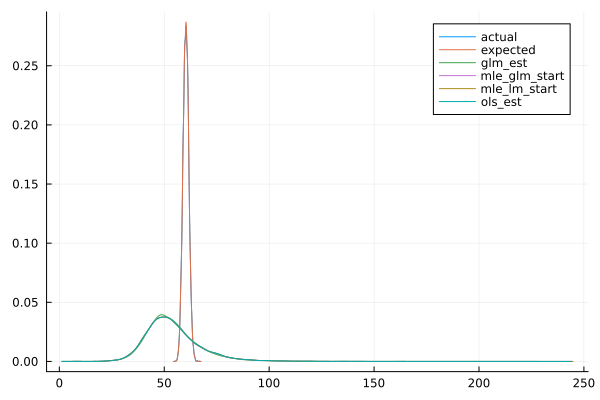

In [11]:
df_plot = stack(df, 1:6)

density(df_plot[:, :value] / 10000, group = df_plot[:, :variable])

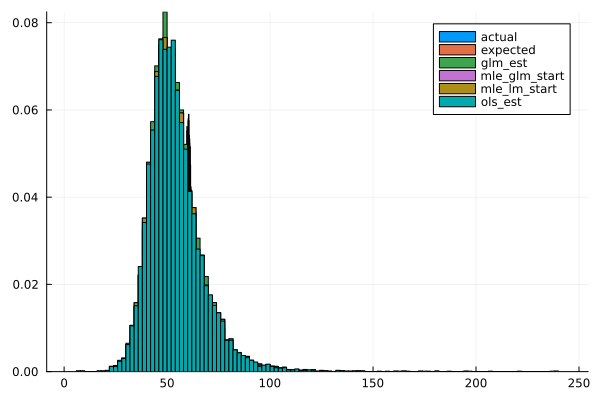

In [12]:
histogram(df_plot[:, :value] / 10000, group = df_plot[:, :variable], bar_position = :stack; normalize=:probability)

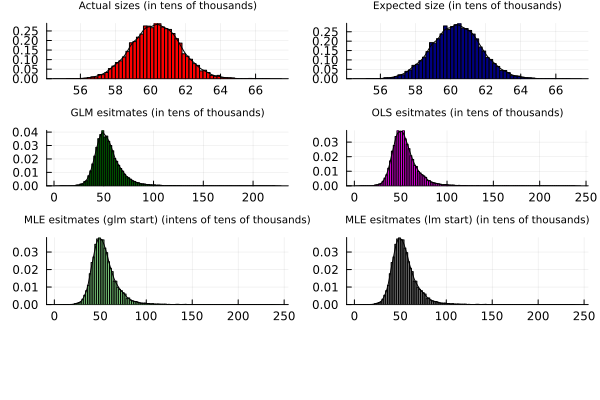

In [13]:
p1 = histogram(df[:, 1] / 10000, normalize = true, legend = false, colour = :red, title = "Actual sizes (in tens of thousands)", titlefontsize = 7)
density!(df[:, 1] / 10000, legend = false, colour = :black)

p2 = histogram(df[:, 2] / 10000, normalize = true, legend = false, title = "Expected size (in tens of thousands)", colour = :navy, titlefontsize = 7)
density!(df[:, 2] / 10000, legend = false, colour = :black)

p3 = histogram(df[:, 3] / 10000, normalize = true, legend = false, title = "GLM esitmates (in tens of thousands)", colour = :darkgreen, titlefontsize = 7)
density!(df[:, 3] / 10000, legend = false, colour = :black)

p4 = histogram(df[:, 4] / 10000, normalize = true, legend = false, title = "OLS esitmates (in tens of thousands)", colour = :magenta, titlefontsize = 7)
density!(df[:, 4] / 10000, legend = false, colour = :black)

p5 = histogram(df[:, 5] / 10000, normalize = true, legend = false, title = "MLE esitmates (glm start) (intens of tens of thousands)", colour = :lightgreen, titlefontsize = 7)
density!(df[:, 5] / 10000, legend = false, colour = :black)

p6 = histogram(df[:, 6] / 10000, normalize = true, legend = false, title = "MLE esitmates (lm start) (in tens of thousands)", colour = :gray, titlefontsize = 7)
density!(df[:, 6] / 10000, legend = false, colour = :black)

plot(
    layout = [3, 3],
    p1, p2, p3, p4, p5, p6
)

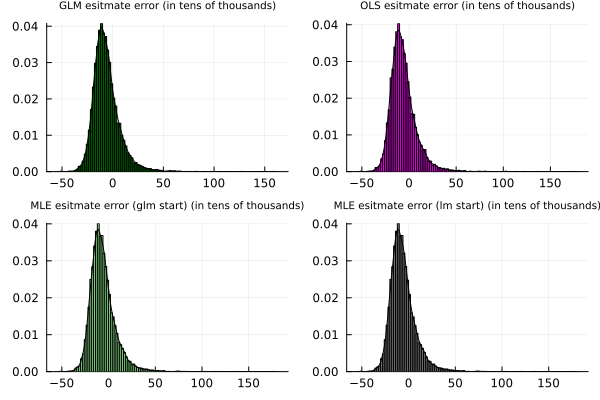

In [15]:
p1 = histogram((df[:, 3] - df[:, 1]) / 10000, normalize = true, legend = false, title = "GLM esitmate error (in tens of thousands)", colour = :darkgreen, titlefontsize = 7)
density!((df[:, 3] - df[:, 1]) / 10000, legend = false, colour = :black)

p2 = histogram((df[:, 4] - df[:, 1]) / 10000, normalize = true, legend = false, title = "OLS esitmate error (in tens of thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 4] - df[:, 1]) / 10000, legend = false, colour = :black)

p3 = histogram((df[:, 5] - df[:, 1]) / 10000, normalize = true, legend = false, title = "MLE esitmate error (glm start) (in tens of thousands)", colour = :lightgreen, titlefontsize = 7)
density!((df[:, 5] - df[:, 1]) / 10000, legend = false, colour = :black)

p4 = histogram((df[:, 6] - df[:, 1]) / 10000, normalize = true, legend = false, title = "MLE esitmate error (lm start) (in tens of thousands)", colour = :gray, titlefontsize = 7)
density!((df[:, 6] - df[:, 1]) / 10000, legend = false, colour = :black)

plot(
    p1, p2, p3, p4, layout = [2, 2]
)